# 使用梯度上升法实现PCA

#### 1. demean

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(666)
X = np.empty((100, 2))
X[:, 0] = np.random.uniform(-1, 1, (100,))
X[:, 1] = 0.75 * X[:, 0] - 50 + np.random.normal(0, 0.1, (100,))

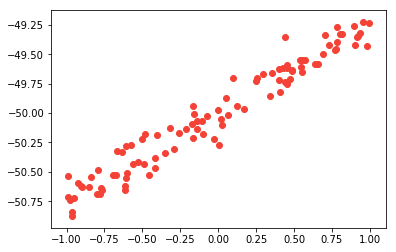

In [3]:
plt.scatter(X[:, 0], X[:, 1], color="#f44336")
plt.show()

In [4]:
def demean(X):
    return X - X.mean(axis=0)
X_demean = demean(X)

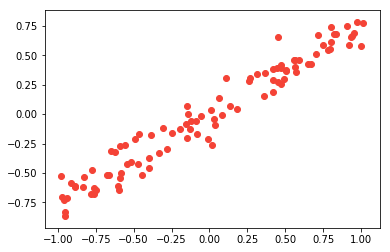

In [5]:
plt.scatter(X_demean[:, 0], X_demean[:, 1], color="#f44336")
plt.show()

#### 2. gradient ascent

In [6]:
def f(w, X):
    return np.mean(X.dot(w) ** 2)
def df_math(w, X):
    return X.T.dot(X.dot(w)) * 2 / X.shape[0]
def df_debug(w, X, epsilon=1e-8):
    res = np.empty(w.shape)
    for k in range(w.shape[0]):
        w_p = w.copy()
        w_p[k] += epsilon
        w_n = w.copy()
        w_n[k] -= epsilon
        res[k] = (f(w_p, X) - f(w_n, X)) / 2 / epsilon
    return res
def direction(w):
    return w / np.linalg.norm(w)

In [7]:
def gradient_ascent(df, X, initial_w, eta=0.01, epsilon=1e-8, n_iters_max=10000):
    
    w = direction(initial_w)
    previous_f = f(w, X)
    n_iters = 0
    
    while n_iters < n_iters_max:
        gradient = df(w, X)
        w += eta * gradient
        w = direction(w)
        current_f = f(w, X)
        
        if np.abs(current_f - previous_f) < epsilon:
            break
        previous_f = current_f
        n_iters += 1
    
    return w

In [8]:
initial_w = np.random.normal(0, 1, (X.shape[1],))
w = gradient_ascent(df_debug, X_demean, initial_w, eta=0.1)
w

array([ 0.79438535,  0.60741413])

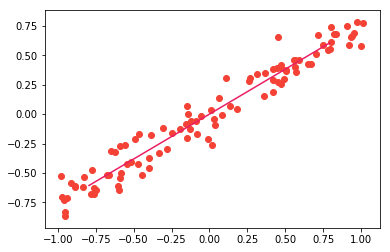

In [9]:
ct = np.linspace(-1, 1, 201)
cx = ct * w[0]
cy = ct * w[1]

plt.scatter(X_demean[:, 0], X_demean[:, 1], color="#f44336")
plt.plot(cx, cy, color="#e91e63")
plt.show()